In [8]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Opening the CSV files
test = pd.read_csv('test_data.csv', encoding='cp1252')
training = pd.read_csv('training_data.csv', encoding='cp1252')

In [10]:
# Checking the column names
training.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
# Dataset Head
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
# Dataset Description
training.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


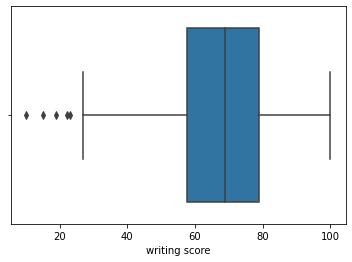

In [14]:
# Checking for outliers
ax1 = sns.boxplot(x=training['writing score'])

In [15]:
# Removing the outliers
training = training.loc[training['writing score']>=25]

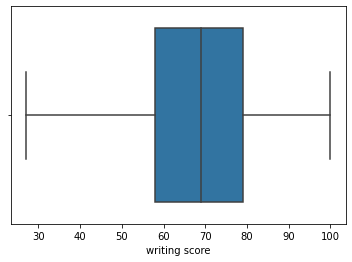

In [16]:
# Checking if there is outliers
ax1 = sns.boxplot(x=training['writing score'])

In [17]:
# Checking gender qualitative qualifiers
training['gender'].unique()

array(['female', 'male'], dtype=object)

In [18]:
# Checking race/ethnicity qualitative qualifiers
training['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [19]:
# Checking parental level of education qualitative qualifiers
training['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
# Checking lunch qualitative qualifiers
training['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [21]:
# Checking test preparation course qualitative qualifiers
training['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [22]:
# Changing qualitative qualifiers to quantitative qualifiers
training_gender_qt = {'male': 1, 'female': 2}
training_race_qt = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
training_parentalEducation_qt = {'some high school': 1, 'some college': 2, 'high school': 3, "associate's degree": 4, "master's degree": 5, "bachelor's degree": 6}
training_lunch_qt = {'free/reduced': 1, 'standard' : 2}
training_testPreparation_qt = {'none': 1, 'completed': 2}

training.replace(training_gender_qt, inplace = True)
training.replace(training_race_qt, inplace = True)
training.replace(training_parentalEducation_qt, inplace = True)
training.replace(training_lunch_qt, inplace = True)
training.replace(training_testPreparation_qt, inplace = True)

test.replace(training_gender_qt, inplace = True)
test.replace(training_race_qt, inplace = True)
test.replace(training_parentalEducation_qt, inplace = True)
test.replace(training_lunch_qt, inplace = True)
test.replace(training_testPreparation_qt, inplace = True)

In [23]:
# Checking if there is any missing values
training.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [24]:
# Though there isn't any missing values, we'll use this code lines for check reasons
print(training.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<AxesSubplot:>

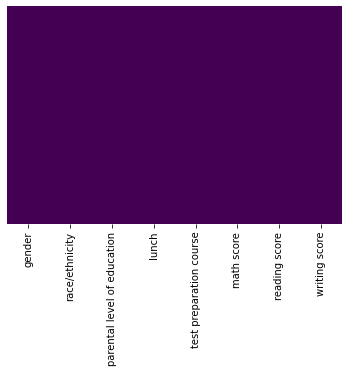

In [25]:
# Checking our dataset heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

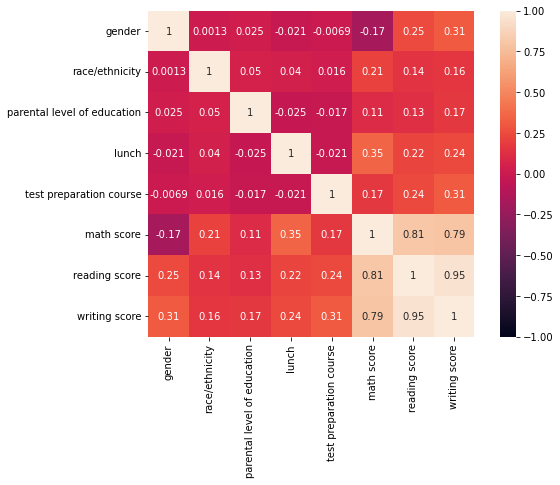

In [26]:
# Checking the correlation matrix
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [27]:
# Visualize how the dataset is at this moment 
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,74
1,2,3,2,2,2,69,90,88
2,2,2,5,2,1,90,95,93
3,1,1,4,1,1,47,57,44
4,1,3,2,2,1,76,78,75


In [28]:
# Starting to prepare the predicitons
X = training.drop(['writing score'], axis=1)
y = training['writing score']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

<AxesSubplot:xlabel='writing score', ylabel='count'>

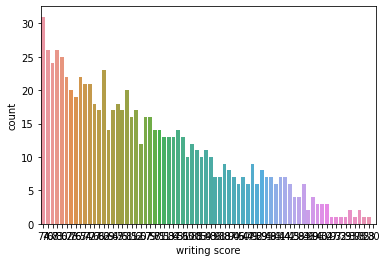

In [30]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['writing score'].value_counts().index)

<AxesSubplot:xlabel='writing score', ylabel='count'>

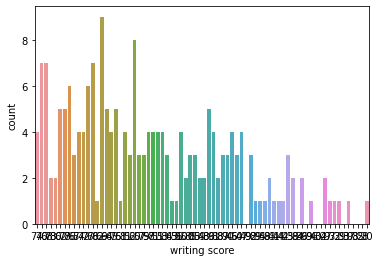

In [31]:
# Checking if the values on y_test look like the ones in y_train
sns.countplot(x = y_test, order = training['writing score'].value_counts().index)

In [32]:
# Using the Decision Tree Classifier Regression Method
from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([42, 38, 45, 74, 48, 55, 57, 91, 90, 74, 79, 52, 68, 60, 73, 78, 57,
       78, 73, 95, 79, 67, 81, 63, 63, 73, 75, 57, 91, 41, 94, 78, 84, 64,
       75, 87, 62, 57, 94, 62, 70, 35, 82, 49, 62, 67, 53, 82, 54, 54, 91,
       72, 82, 58, 66, 63, 82, 90, 70, 94, 52, 70, 45, 60, 77, 86, 57, 57,
       75, 36, 70, 49, 80, 66, 74, 58, 85, 52, 78, 70, 68, 86, 80, 78, 76,
       81, 62, 62, 61, 68, 80, 66, 50, 88, 77, 43, 89, 93, 64, 44, 48, 94,
       71, 43, 56, 34, 74, 63, 56, 80, 74, 82, 73, 76, 82, 61, 81, 72, 73,
       67, 41, 59, 32, 54, 87, 87, 33, 44, 50, 62, 78, 52, 60, 61, 69, 56,
       77, 72, 74, 60, 86, 54, 68, 80, 61, 66, 92, 70, 66, 69, 54, 43, 39,
       74, 73, 32, 56, 73, 90, 94, 66, 82, 87, 68, 71, 61, 74, 71, 53, 84,
       70, 80, 45, 58, 82, 95, 54, 88, 58, 89, 41, 66, 72, 65, 65, 34, 95,
       57, 41, 92, 49, 72, 85, 48, 99, 73, 68, 70, 59])

/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         0
          50       0.00      0.00      0.00         3
          52       0.00      0.00      0.00         3
          53       0.50      0.25      0.33         4
          54       0.33    

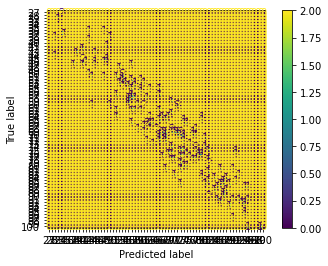

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, labels=np.unique(predictions)))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [37]:
# Using the Linear Regression Method

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

predictions = linearmodel.predict(X_test)
predictions

array([ 48.87751474,  41.54130961,  45.00733577,  73.00214455,
        34.82616957,  53.22096799,  55.0366054 ,  82.40341204,
        94.09283521,  73.36838414,  81.86018238,  55.4555588 ,
        77.41890005,  60.7214706 ,  68.97461375,  72.08693866,
        61.33632855,  70.54995656,  74.46817406, 100.37496791,
        76.84290636,  66.22057808,  78.19372551,  61.30316168,
        61.45867405,  76.81589129,  80.94096927,  61.94818634,
        77.41690685,  43.08032509,  94.73726936,  71.58528813,
        85.22736595,  66.54635218,  78.95133088,  87.7128007 ,
        66.55595441,  57.53063002,  94.15431556,  61.24208157,
        61.52747213,  39.64495141,  82.94033966,  46.24383251,
        65.47700152,  71.50570948,  53.60843378,  82.72393362,
        53.77076484,  55.98174848,  88.44596954,  62.27071618,
        84.62744491,  53.30467445,  74.04627919,  66.71549146,
        82.43636344,  86.17818559,  74.02869982,  92.69013876,
        58.21215445,  69.56917406,  50.67253982,  56.20

You have got  0.95 accuracy  in this prediction


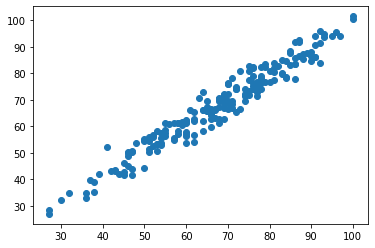

In [38]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

# Printing the results

print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % r2_score(y_test, predictions))

plt.scatter(y_test, predictions)

In [43]:
# Using the Logistic Regression method

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions

/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 42,  38,  43,  78,  40,  54,  53,  85,  90,  74,  80,  54,  74,
        62,  73,  73,  68,  68,  74, 100,  80,  67,  74,  61,  62,  78,
        82,  57,  81,  43,  94,  73,  90,  64,  80,  81,  62,  61,  95,
        62,  61,  42,  82,  52,  70,  74,  57,  82,  54,  54,  87,  61,
        79,  52,  73,  65,  82,  82,  73,  88,  58,  70,  52,  61,  80,
        82,  57,  51,  68,  38,  70,  49,  80,  78,  67,  54,  89,  52,
        80,  73,  68,  92,  73,  82,  82,  73,  62,  61,  61,  72,  74,
        70,  41,  85,  80,  44,  88,  97,  68,  43,  54,  94,  74,  34,
        52,  34,  77,  68,  54,  74,  70,  88,  74,  77,  82,  68,  82,
        71,  78,  73,  41,  61,  33,  56,  82,  88,  28,  58,  54,  62,
        73,  54,  68,  61,  72,  54,  74,  68,  66,  61,  81,  61,  73,
        80,  57,  65,  93,  65,  61,  59,  54,  43,  43,  67,  79,  32,
        61,  82,  82,  95,  64,  85,  88,  74,  80,  61,  82,  71,  49,
        90,  70,  70,  43,  54,  80,  90,  54,  85,  61,  88,  4

/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pedrobarbosa/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          28       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.29      1.00      0.44         2
          44       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         0
          51       0.00      0.00      0.00         4
          52       0.00      0.00      0.00         3
          53       0.00      0.00      0.00         4
          54       0.14      0.50      0.22         4
          56       0.00      0.00      0.00         1
          57       0.00      0.00      0.00         3
          58       0.00    

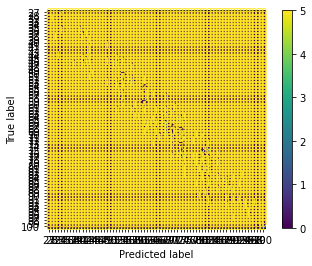

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions,labels=np.unique(predictions)))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()

In [46]:
# Using the Logistic Regression method

from sklearn.svm import SVC

svcmodel = SVC()
svcmodel.fit(X_train,y_train)

predictions = svcmodel.predict(X_test)
predictions

array([ 54,  54,  54,  74,  54,  54,  54,  82, 100,  74,  74,  54,  74,
        54,  74,  74,  70,  74,  74, 100,  74,  74,  74,  54,  54,  74,
        82,  54,  74,  54,  82,  74,  82,  70,  74,  74,  74,  70,  82,
        54,  74,  54,  82,  54,  74,  74,  54,  74,  54,  54,  74,  74,
        74,  54,  74,  74,  82,  82,  74,  82,  54,  74,  54,  70,  74,
        74,  70,  54,  74,  54,  74,  54,  74,  74,  74,  54,  74,  54,
        74,  74,  74,  82,  74,  82,  82,  74,  74,  54,  74,  74,  74,
        74,  54,  74,  74,  54,  82,  82,  74,  54,  54,  82,  74,  54,
        54,  54,  74,  74,  54,  74,  74,  82,  74,  74,  82,  74,  82,
        74,  74,  74,  54,  70,  54,  54,  74,  74,  54,  54,  54,  54,
        74,  54,  74,  74,  74,  54,  74,  74,  74,  54,  74,  54,  74,
        74,  74,  62,  82,  74,  74,  54,  54,  54,  54,  74,  74,  54,
        54,  82,  82,  82,  74,  74,  74,  74,  74,  54,  74,  74,  54,
        82,  74,  74,  54,  54,  74,  82,  54,  74,  70,  82,  5

              precision    recall  f1-score   support

          27       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          46       0.00      0.00      0.00         4
          47       0.00      0.00      0.00         4
          48       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         3
          51       0.00      0.00      0.00         4
          52       0.00    

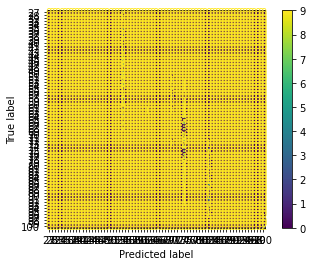

In [47]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, zero_division=0))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=svcmodel.classes_)
disp.plot()